In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('real_final_train.csv')
print(data.head())

   home_rank  home_winning_rate  home_winning  away_rank  away_winning_rate  \
0          1              1.000             1          6              0.000   
1          1              1.000             2          8              0.000   
2          3              0.667             2          3              0.667   
3          4              0.500            -1          3              0.750   
4          3              0.600             1          3              0.600   

   away_winning  temp  insolation  rain  holiday  ...  LG  DOOSAN  KIA  KT  \
0            -1   8.2       24.09     0        1  ...   0       1    0   0   
1            -2   9.6       24.34     0        1  ...   0       1    0   0   
2             2  10.3       21.21     0        0  ...   0       1    0   0   
3             3  11.7       21.54     0        0  ...   0       1    0   0   
4            -1  10.9       24.30     0        0  ...   0       1    0   0   

   NC  SSG  LOTTE  SAMSUNG  KIWOOM  HANHWA  
0   0    0 

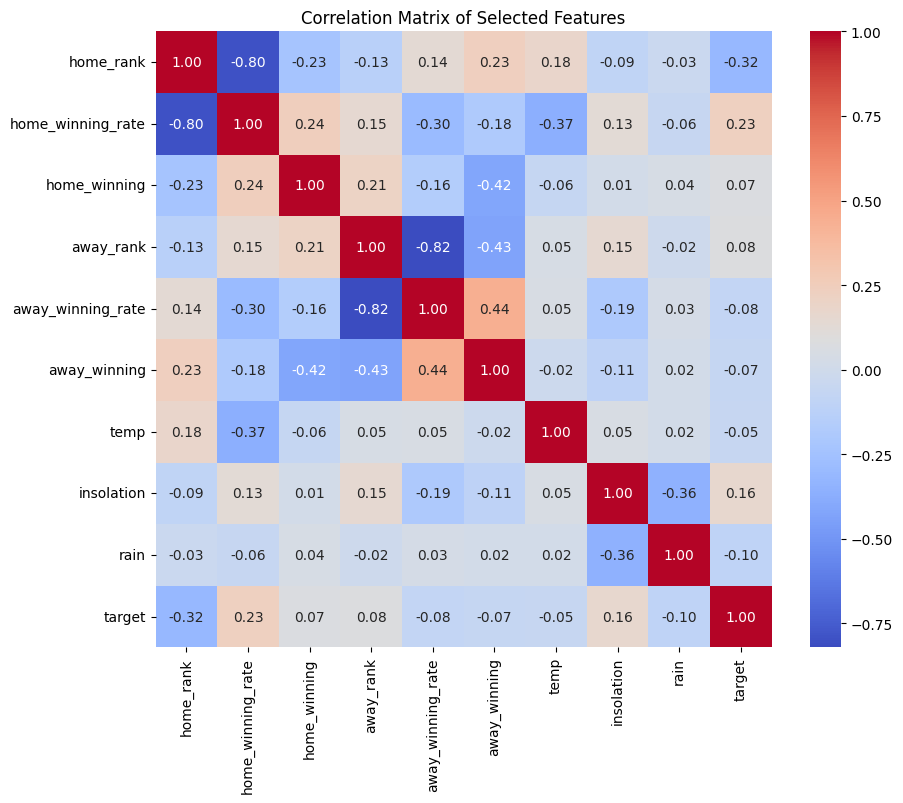

In [2]:
# 수치형 변수간의 correlation matrix
corr_matrix = data[['home_rank','home_winning_rate','home_winning','away_rank','away_winning_rate',
                  'away_winning','temp','insolation','rain','target']].corr()

plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

plt.title('Correlation Matrix of Selected Features')
plt.yticks(rotation=0)

plt.show()

Text(0, 0.5, 'Target')

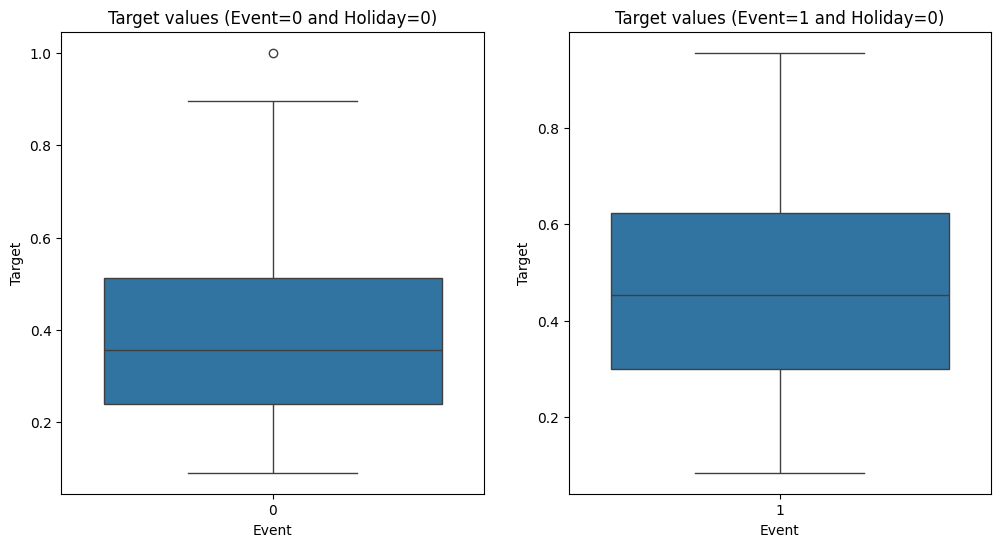

In [3]:
# holiday가 0 (공휴일이 아닐 때)일 때 event가 0,1인 boxplot
holiday_event_data = data[data['holiday'] == 0]

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(ax=ax[0], x='event', y='target', data=holiday_event_data[holiday_event_data['event'] == 0])
ax[0].set_title('Target values (Event=0 and Holiday=0)')
ax[0].set_xlabel('Event')
ax[0].set_ylabel('Target')

sns.boxplot(ax=ax[1], x='event', y='target', data=holiday_event_data[holiday_event_data['event'] == 1])
ax[1].set_title('Target values (Event=1 and Holiday=0)')
ax[1].set_xlabel('Event')
ax[1].set_ylabel('Target')

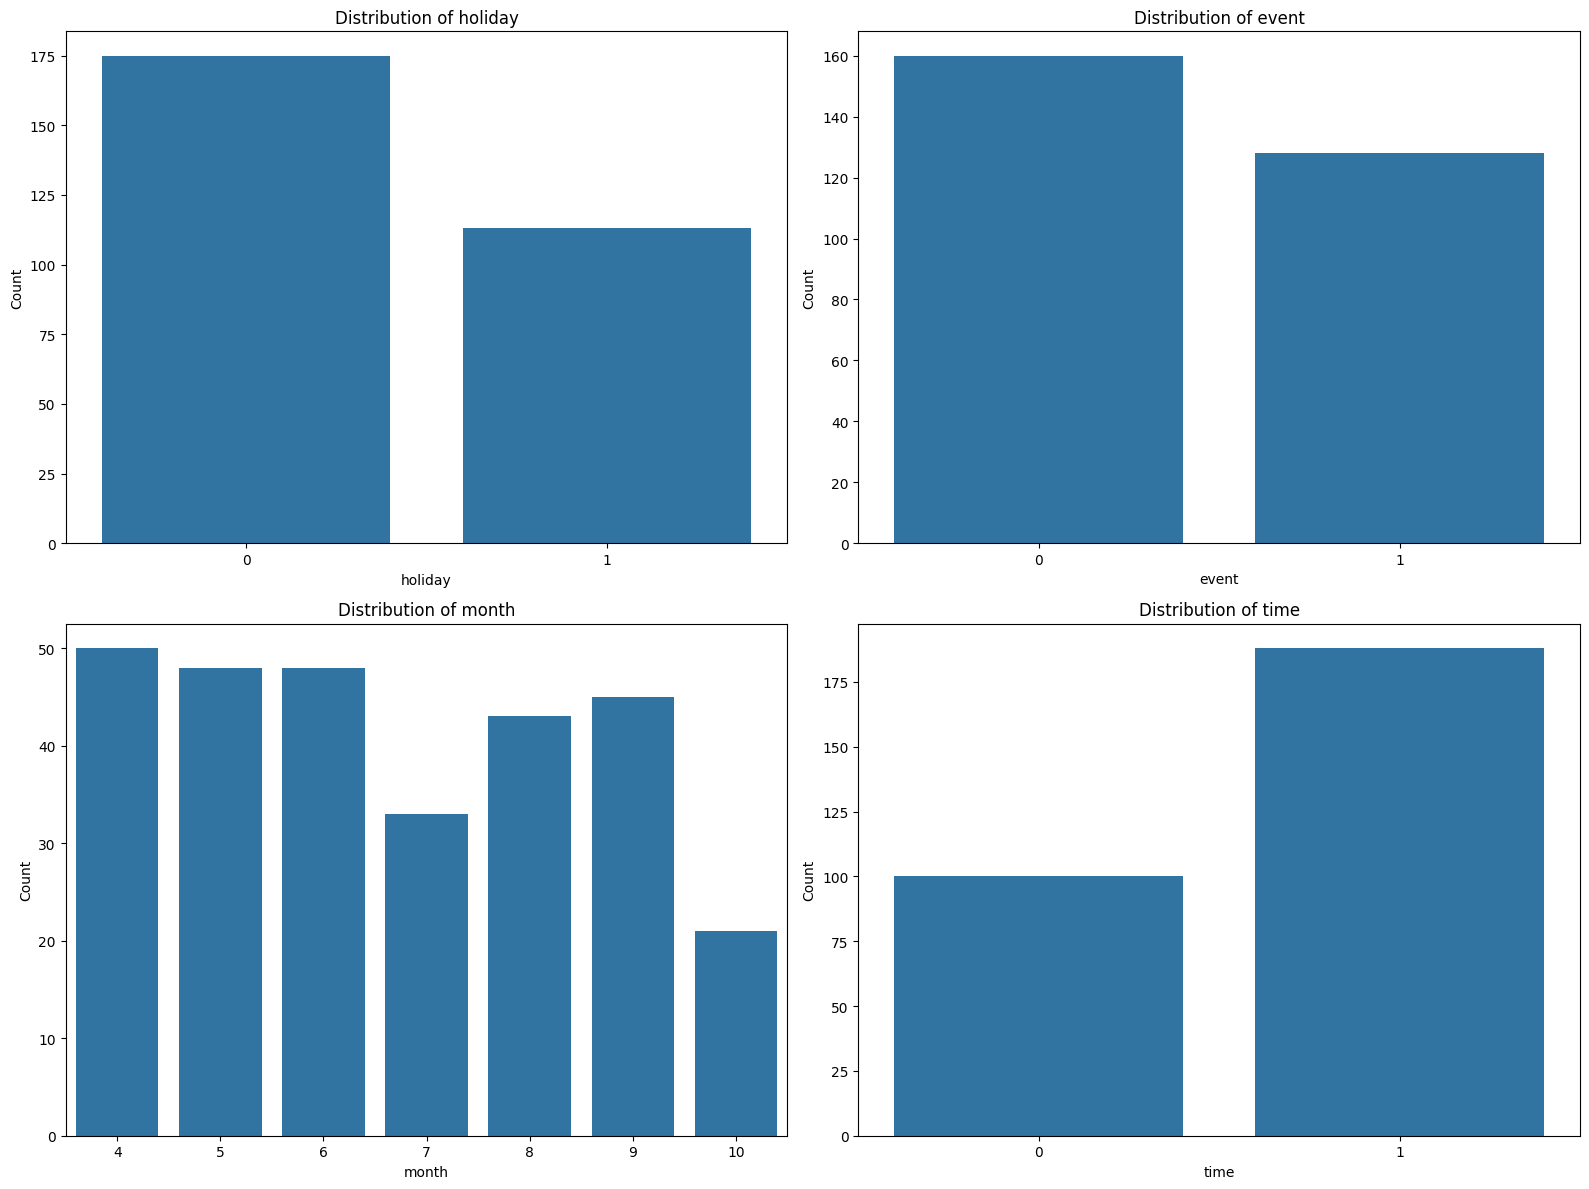

In [4]:
# categorical 변수의 데이터 분포 확인
categorical_features = ['holiday', 'event', 'month', 'time']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    sns.countplot(ax=axes[i], x=feature, data=data)
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

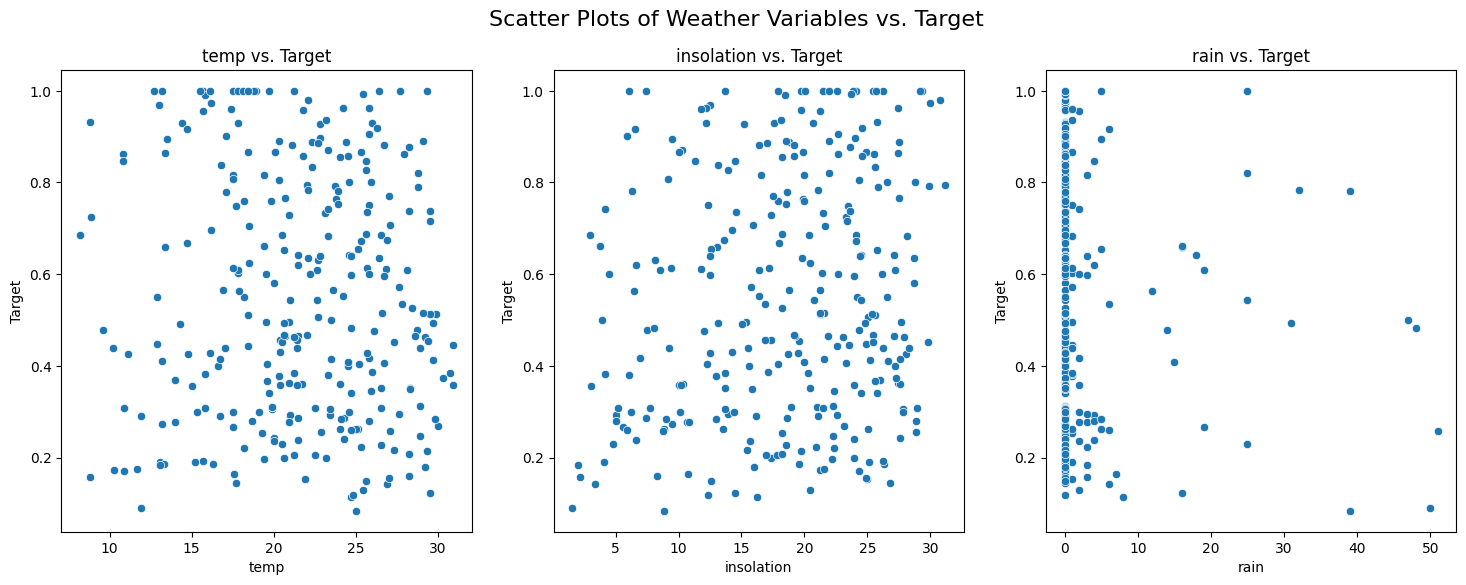

In [5]:
# 날씨 변수와 target간의 scatterplot
selected_features = ['temp','insolation','rain']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Scatter Plots of Weather Variables vs. Target', fontsize=16)

for i, feature in enumerate(selected_features):
    sns.scatterplot(ax=axes[i], x=data[feature], y=data['target'])
    axes[i].set_title(f'{feature} vs. Target')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Target')

plt.show()

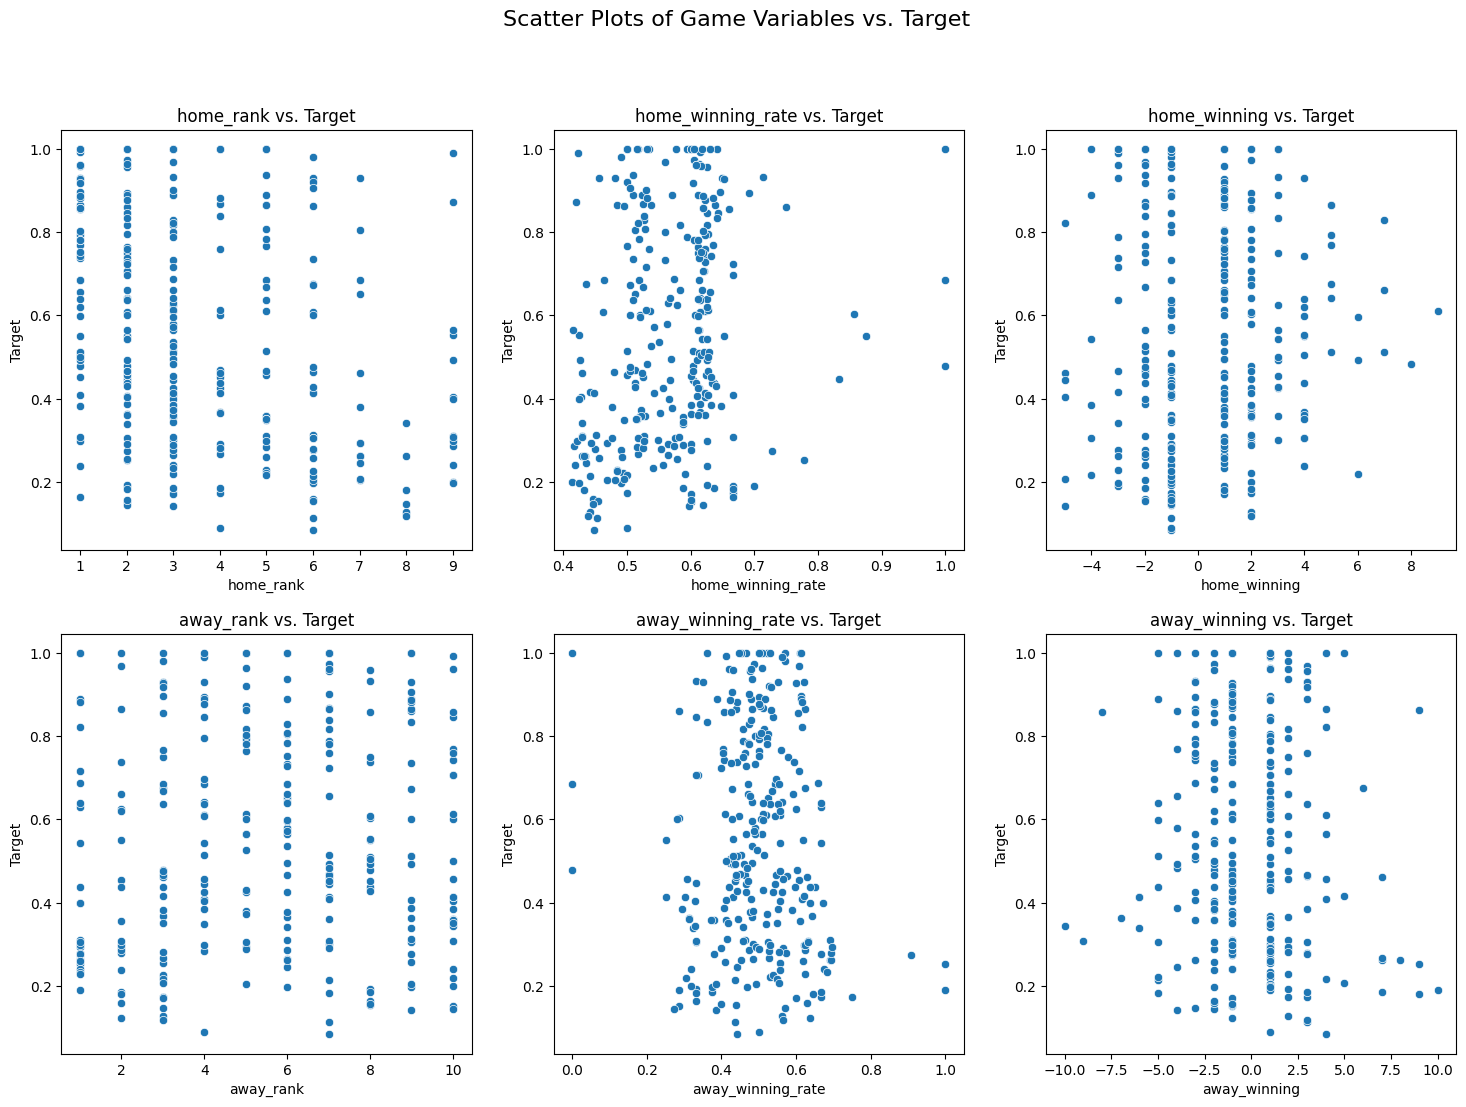

In [6]:
# home, away (Game variable)와 target간의 scatterplot
selected_features = ['home_rank','home_winning_rate','home_winning','away_rank','away_winning_rate',
                  'away_winning']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Scatter Plots of Game Variables vs. Target', fontsize=16)
axes = axes.flatten()

for i, feature in enumerate(selected_features):
    sns.scatterplot(ax=axes[i], x=data[feature], y=data['target'])
    axes[i].set_title(f'{feature} vs. Target')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Target')

plt.show()

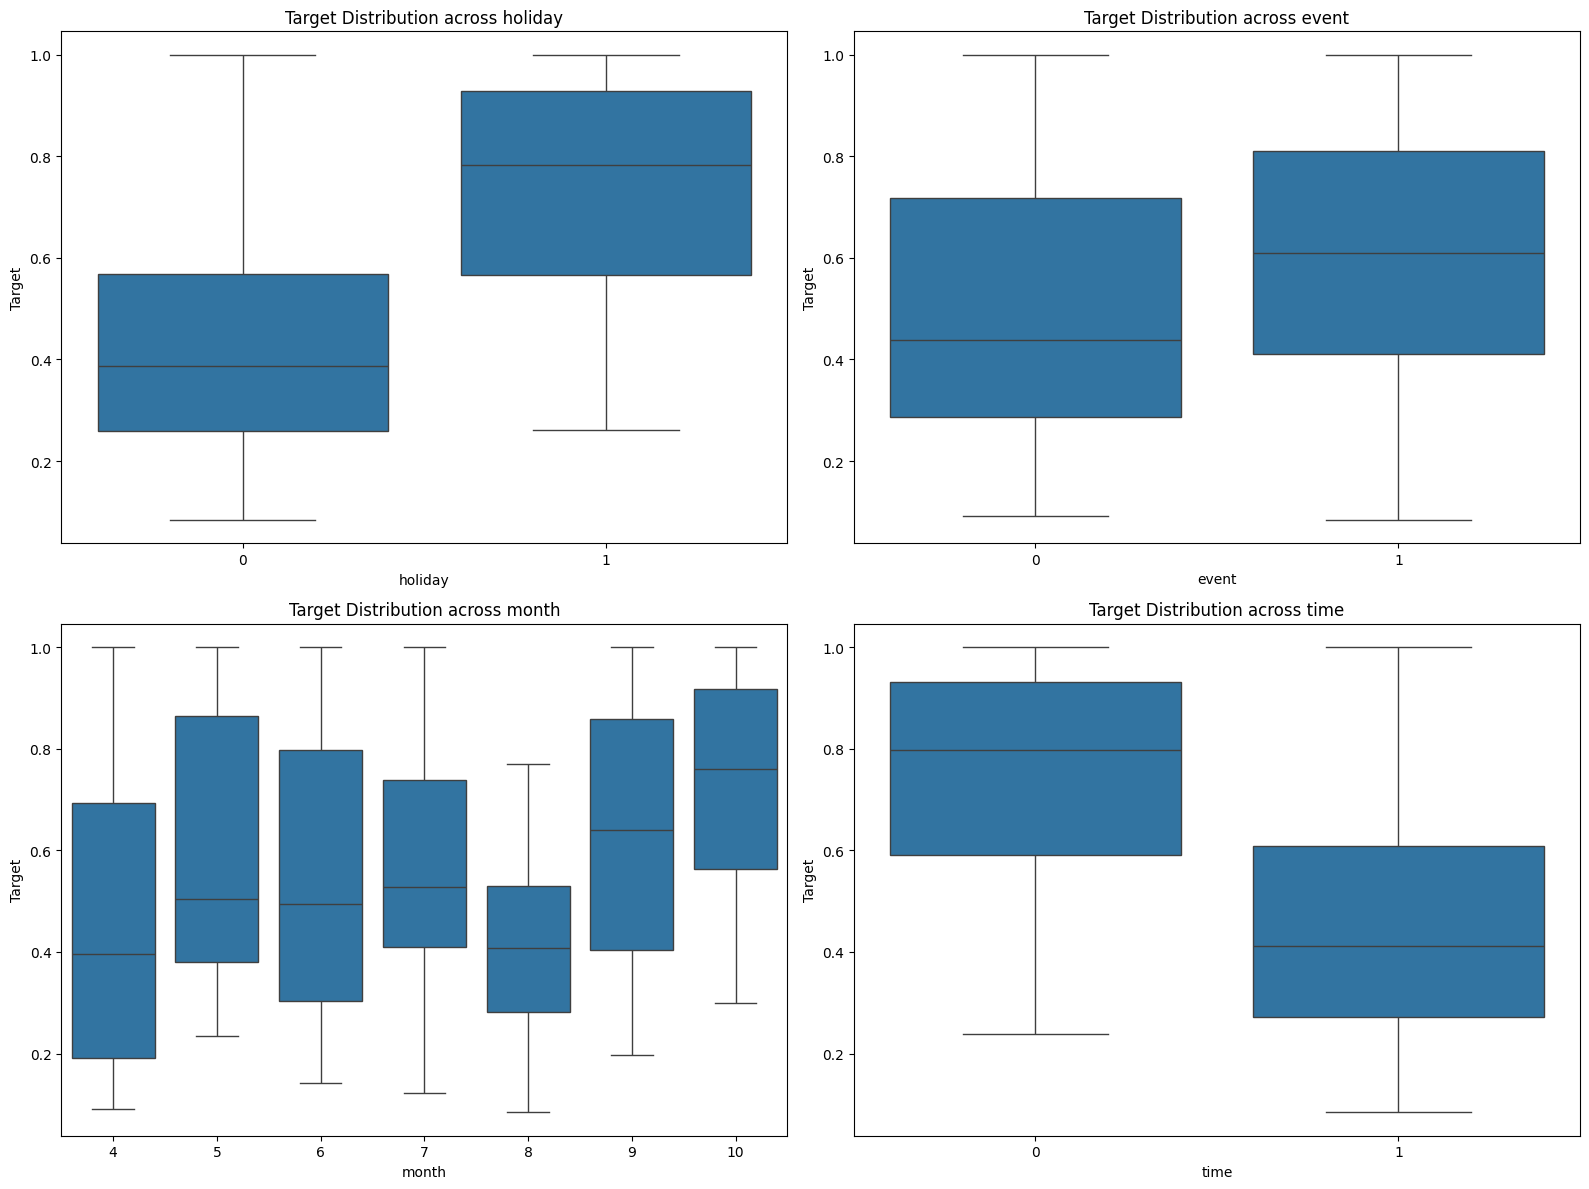

In [7]:
# categorical features와 target간의 boxplot
categorical_features = ['holiday', 'event', 'month', 'time']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    sns.boxplot(ax=axes[i], x=feature, y='target', data=data)
    axes[i].set_title(f'Target Distribution across {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Target')

plt.tight_layout()
plt.show()